<a href="https://colab.research.google.com/github/Sercan1111/Electrical-Fault-Classification-Using-ANN/blob/main/Electrical_Fault_Detection_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
fault = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/detect_dataset.csv")
fault_type = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/classData.csv")


In [ ]:
fault.head(10)


,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN
5,0,-55.954681,-1.001882,56.956562,0.193414,-0.590695,0.397281,NaN,NaN
6,0,-45.248446,-2.586980,47.835426,0.212393,-0.584136,0.371743,NaN,NaN
7,0,-47.845420,-3.428094,51.273513,0.216396,-0.590123,0.373727,NaN,NaN
8,0,-43.294259,-4.511300,47.805558,0.229748,-0.587588,0.357840,NaN,NaN
9,0,-43.474722,-5.388233,48.862955,0.235733,-0.591320,0.355587,NaN,NaN


In [ ]:
fault_type.head(10)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
5,1,0,0,1,-632.312778,-181.714572,-90.795453,0.193116,-0.086144,-0.106972
6,1,0,0,1,-557.391809,-119.468643,-29.529450,0.210004,-0.076712,-0.133291
7,1,0,0,1,-458.799929,-96.318922,-7.381847,0.273652,-0.067262,-0.206389
8,1,0,0,1,-385.668729,-97.989839,-10.076824,0.334649,-0.057795,-0.276853
9,1,0,0,1,-359.929338,-87.319478,-0.452216,0.347420,-0.048314,-0.299106


In [ ]:
# Unnamed: 7 ve Unnamed: 8 sütunlarını düşürme
fault = fault.drop(columns=["Unnamed: 7", "Unnamed: 8"])

# Veri setini tekrar baştan inceleme
print(fault.head())

   Output (S)          Ia        Ib          Ic        Va        Vb        Vc
0           0 -170.472196  9.219613  161.252583  0.054490 -0.659921  0.605431
1           0 -122.235754  6.168667  116.067087  0.102000 -0.628612  0.526202
2           0  -90.161474  3.813632   86.347841  0.141026 -0.605277  0.464251
3           0  -79.904916  2.398803   77.506112  0.156272 -0.602235  0.445963
4           0  -63.885255  0.590667   63.294587  0.180451 -0.591501  0.411050


In [ ]:
# LL Fault durumunu kontrol etme
ll_fault_rows = fault_type[(fault_type['G'] == 0) & (fault_type['C'] == 0) & (fault_type['B'] == 1) & (fault_type['A'] == 1)]

# LL Fault durumu varsa, bu satırları göster
if not ll_fault_rows.empty:
    print("LL Fault (G = 0, C = 0, B = 1, A = 1) durumu mevcut:")
    print(ll_fault_rows)
else:
    print("LL Fault (G = 0, C = 0, B = 1, A = 1) durumu mevcut değil.")


LL Fault (G = 0, C = 0, B = 1, A = 1) durumu mevcut değil.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature ve output ayrımı
fault_features = fault.drop(columns=["Output (S)"])
fault_output = fault["Output (S)"]

# Fault type veri setini dönüştürme
def classify_fault(row):
    if row['G'] == 0 and row['C'] == 0 and row['B'] == 0 and row['A'] == 0:
        return 'No Fault'
    elif row['G'] == 1 and row['C'] == 0 and row['B'] == 0 and row['A'] == 1:
        return 'LG Fault'
    elif row['G'] == 1 and row['C'] == 0 and row['B'] == 1 and row['A'] == 1:
        return 'LLG Fault'
    elif row['G'] == 0 and row['C'] == 1 and row['B'] == 1 and row['A'] == 1:
        return 'LLL Fault'
    elif row['G'] == 1 and row['C'] == 1 and row['B'] == 1 and row['A'] == 1:
        return 'LLLG Fault'
    else:
        return 'Unknown'

fault_type['Fault Type'] = fault_type.apply(classify_fault, axis=1)

# Fault type sınıflarını binary olarak etiketleme
fault_type_binary = pd.get_dummies(fault_type['Fault Type'])
fault_type_features = fault_type.drop(columns=["G", "C", "B", "A", "Fault Type"])

# Standardizasyon
scaler = StandardScaler()

# fault veri seti için
fault_features_scaled = scaler.fit_transform(fault_features)
fault_scaled = pd.DataFrame(fault_features_scaled, columns=fault_features.columns)
fault_scaled["Output (S)"] = fault_output.values

# fault_type veri seti için
fault_type_features_scaled = scaler.fit_transform(fault_type_features)
fault_type_scaled = pd.DataFrame(fault_type_features_scaled, columns=fault_type_features.columns)
fault_type_scaled = pd.concat([fault_type_scaled, fault_type_binary], axis=1)

# Output sütunlarını belirleme
output_columns = ["LG Fault", "LLG Fault", "LLL Fault", "LLLG Fault", "No Fault"]

# Yalnızca output sütunlarını True/False'dan 1/0'a dönüştürme
fault_type_scaled[output_columns] = fault_type_scaled[output_columns].applymap(lambda x: 1 if x else 0)

# Gereksiz Unknown sütununu kaldırma
fault_type_scaled = fault_type_scaled.drop(columns=["Unknown"], errors='ignore')

# Dönüştürülmüş ve standardize edilmiş veri setinin ilk birkaç satırını görüntüleme
print("Güncellenmiş ve standardize edilmiş fault_type veri seti:")
print(fault_type_scaled.head())

Güncellenmiş ve standardize edilmiş fault_type veri seti:
         Ia        Ib        Ic        Va        Vb        Vc  LG Fault  \
0 -0.355087  0.080065  0.138534  1.412563 -0.427823 -0.891036         1   
1 -0.752955 -0.071573 -0.043288  1.108142 -0.398144 -0.635362         1   
2 -1.111683 -0.295516 -0.310757  0.945574 -0.368368 -0.513005         1   
3 -1.307612 -0.393538 -0.429241  0.841062 -0.338502 -0.445259         1   
4 -1.414607 -0.408236 -0.449158  0.751228 -0.308553 -0.391383         1   

   LLG Fault  LLL Fault  LLLG Fault  No Fault  
0          0          0           0         0  
1          0          0           0         0  
2          0          0           0         0  
3          0          0           0         0  
4          0          0           0         0  


In [ ]:
fault_scaled.head(5)

,Ia,Ib,Ic,Va,Vb,Vc,Output (S)
0,-0.469800,0.100092,0.459871,0.127013,-1.801934,1.719221,0
1,-0.341900,0.091557,0.310270,0.264243,-1.714387,1.492370,0
2,-0.256855,0.084968,0.211875,0.376966,-1.649138,1.314993,0
3,-0.229659,0.081010,0.182602,0.421006,-1.640633,1.262629,0
4,-0.187183,0.075952,0.135550,0.490846,-1.610619,1.162666,0


In [ ]:
fault_type_scaled.head(5)


,Ia,Ib,Ic,Va,Vb,Vc,LG Fault,LLG Fault,LLL Fault,LLLG Fault,No Fault
0,-0.355087,0.080065,0.138534,1.412563,-0.427823,-0.891036,1,0,0,0,0
1,-0.752955,-0.071573,-0.043288,1.108142,-0.398144,-0.635362,1,0,0,0,0
2,-1.111683,-0.295516,-0.310757,0.945574,-0.368368,-0.513005,1,0,0,0,0
3,-1.307612,-0.393538,-0.429241,0.841062,-0.338502,-0.445259,1,0,0,0,0
4,-1.414607,-0.408236,-0.449158,0.751228,-0.308553,-0.391383,1,0,0,0,0


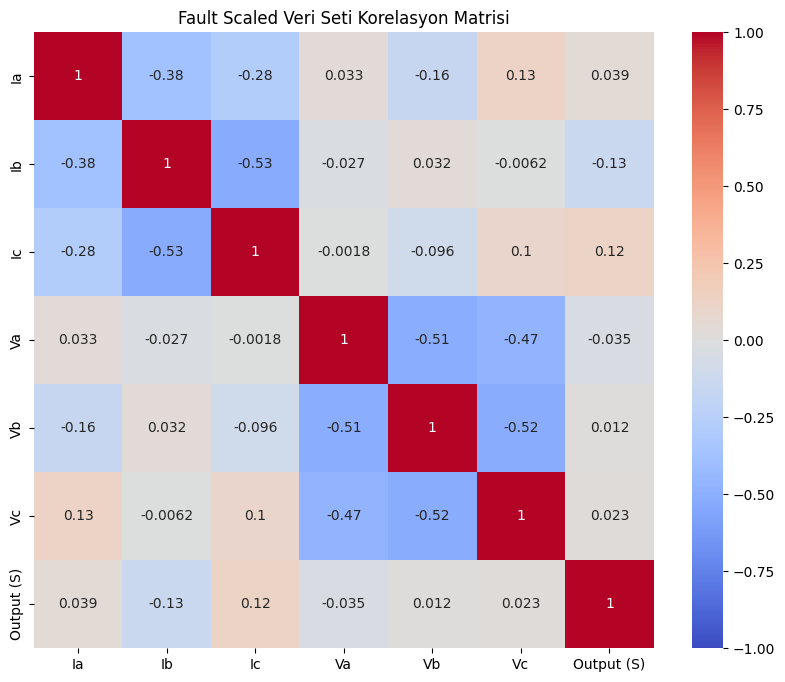

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# fault_scaled veri seti için korelasyon matrisi
fault_corr_matrix = fault_scaled.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(fault_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Fault Scaled Veri Seti Korelasyon Matrisi')
plt.show()


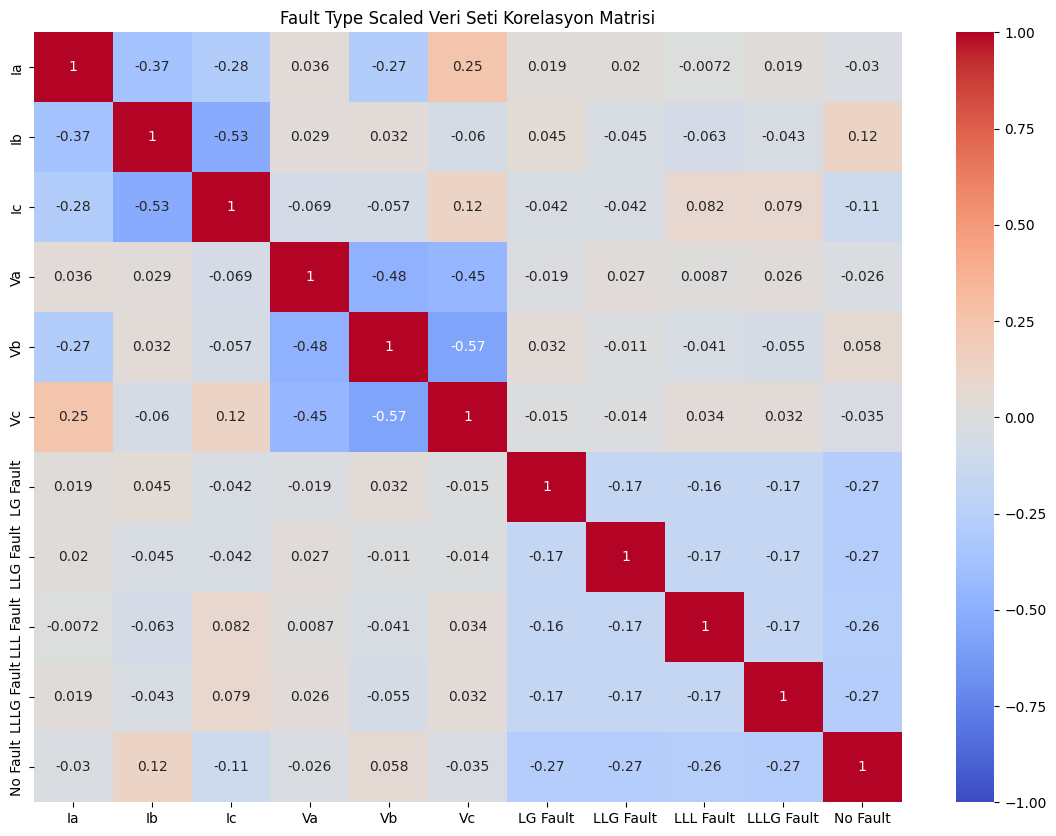

In [ ]:
# fault_type_scaled veri seti için korelasyon matrisi
fault_type_corr_matrix = fault_type_scaled.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(14, 10))
sns.heatmap(fault_type_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Fault Type Scaled Veri Seti Korelasyon Matrisi')
plt.show()


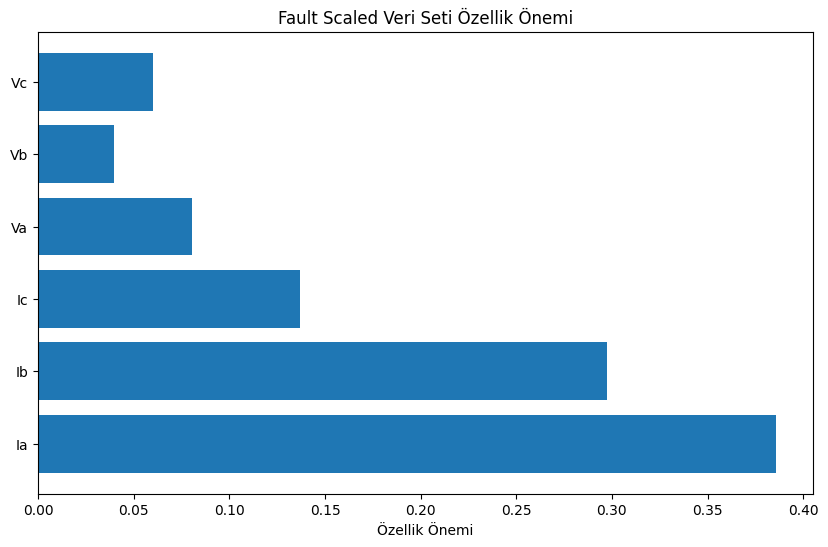

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# fault_scaled veri seti için
X_fault = fault_scaled.drop(columns=["Output (S)"])
y_fault = fault_scaled["Output (S)"]

# Random Forest modelini eğitme
rf_model_fault = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_fault.fit(X_fault, y_fault)

# Özellik önem derecelerini çıkarma
feature_importances_fault = rf_model_fault.feature_importances_
features_fault = X_fault.columns

# Özellik önem derecelerini görselleştirme
plt.figure(figsize=(10, 6))
plt.barh(features_fault, feature_importances_fault)
plt.xlabel('Özellik Önemi')
plt.title('Fault Scaled Veri Seti Özellik Önemi')
plt.show()


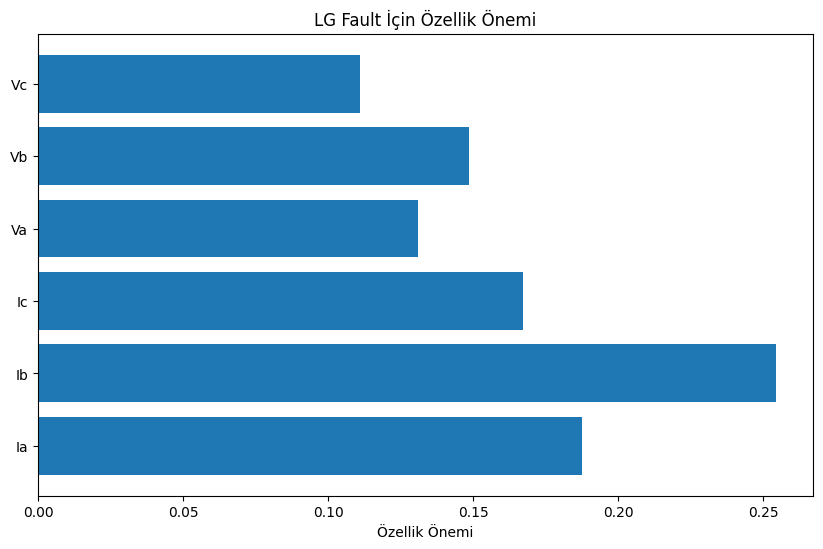

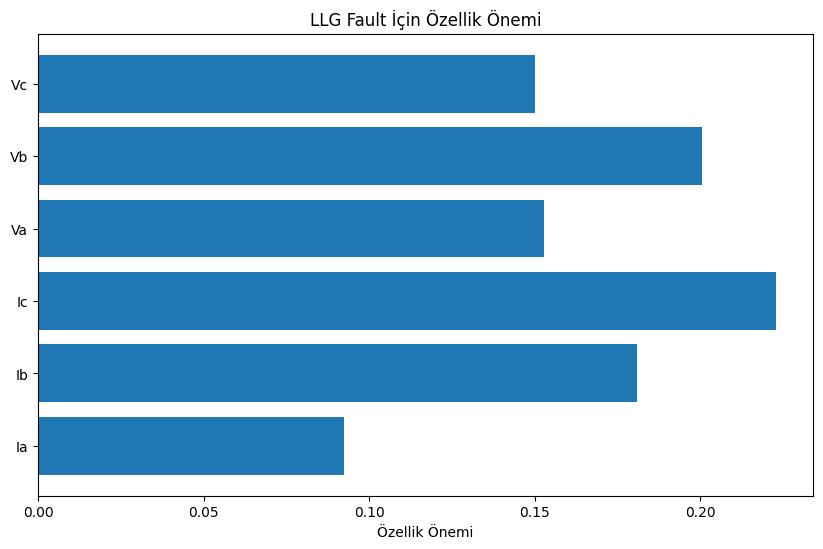

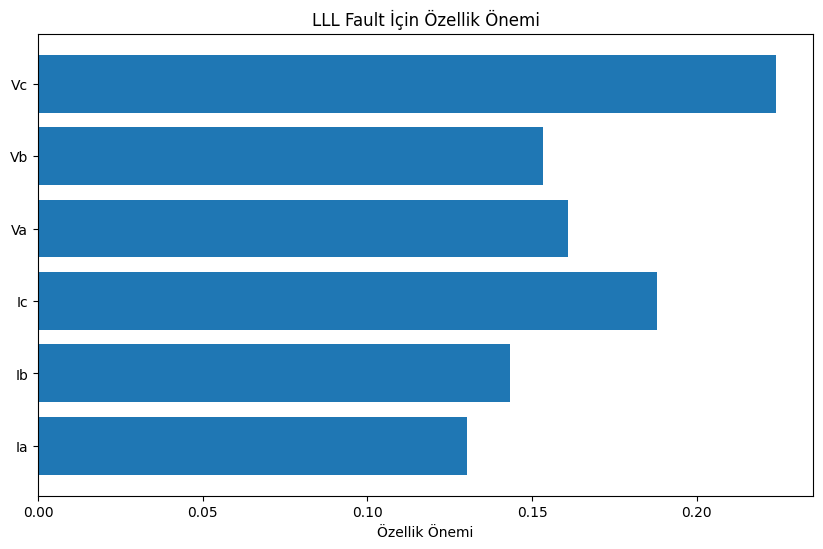

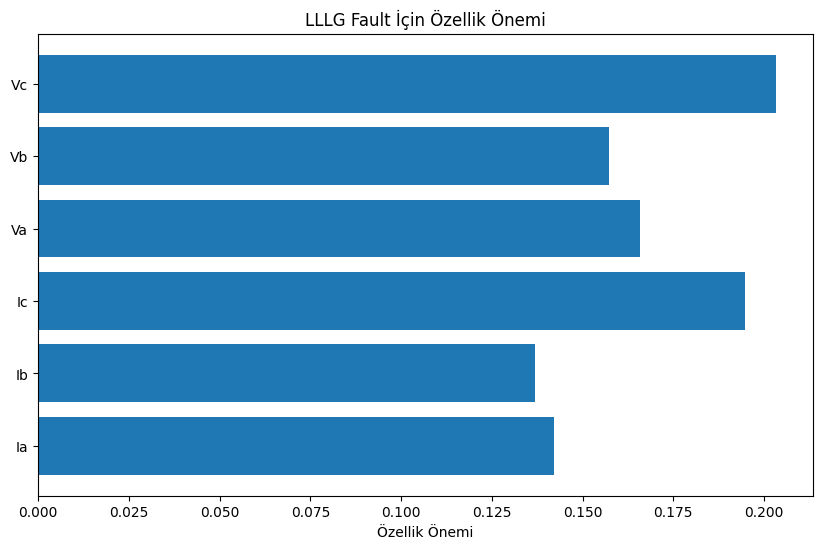

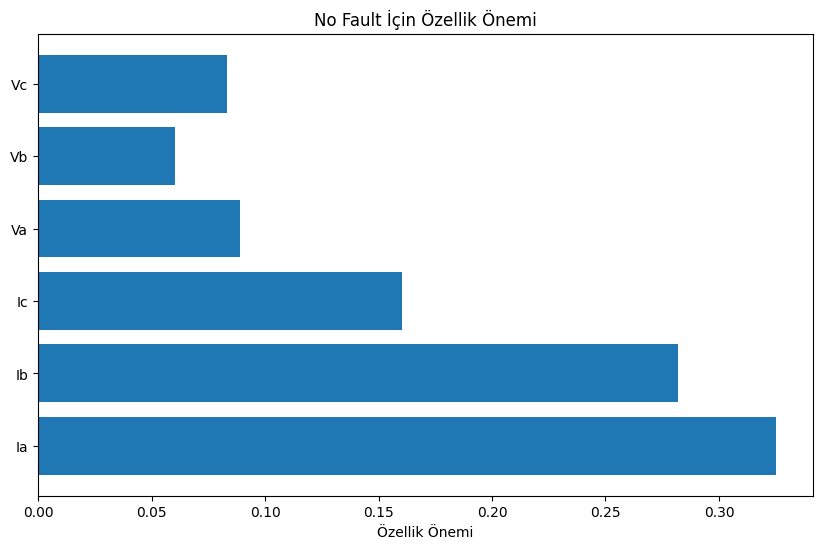

In [ ]:
# fault_type_scaled veri seti için
X_fault_type = fault_type_scaled.drop(columns=["LG Fault",  "LLG Fault", "LLL Fault", "LLLG Fault", "No Fault"])
y_fault_type = fault_type_scaled[["LG Fault", "LLG Fault", "LLL Fault", "LLLG Fault", "No Fault"]]

# Random Forest modelini eğitme (her bir sınıf için ayrı model)
feature_importances_fault_type = {}

for col in y_fault_type.columns:
    rf_model_fault_type = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model_fault_type.fit(X_fault_type, y_fault_type[col])
    feature_importances_fault_type[col] = rf_model_fault_type.feature_importances_

# Özellik önem derecelerini görselleştirme
for fault, importances in feature_importances_fault_type.items():
    plt.figure(figsize=(10, 6))
    plt.barh(X_fault_type.columns, importances)
    plt.xlabel('Özellik Önemi')
    plt.title(f'{fault} İçin Özellik Önemi')
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Veri setlerini ayırma
X_train_fault, X_temp_fault, y_train_fault, y_temp_fault = train_test_split(fault_features, fault_output, test_size=0.2, random_state=42)
X_val_fault, X_test_fault, y_val_fault, y_test_fault = train_test_split(X_temp_fault, y_temp_fault, test_size=0.5, random_state=42)

X_train_fault_type, X_temp_fault_type, y_train_fault_type, y_temp_fault_type = train_test_split(fault_type_features, fault_type_scaled[output_columns], test_size=0.2, random_state=42)
X_val_fault_type, X_test_fault_type, y_val_fault_type, y_test_fault_type = train_test_split(X_temp_fault_type, y_temp_fault_type, test_size=0.5, random_state=42)


In [ ]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(6,)))

    # Hidden layers
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),
                                                  min_value=32,
                                                  max_value=512,
                                                  step=32),
                                     activation='relu'))

    # Output layer for binary classification
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])

    return model


In [ ]:
from keras.callbacks import EarlyStopping

# Hiperparametre optimizasyonu için tuner tanımlama
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=2,
    executions_per_trial=2,
    directory='my_dir',
    project_name='fault_detection')
# EarlyStopping callback'i tanımlama
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Tuner'ı çalıştırma
tuner.search(X_train_fault, y_train_fault, epochs=50, validation_data=(X_val_fault, y_val_fault))

# En iyi hiperparametrelerle model eğitme
best_model = tuner.get_best_models(num_models=1)[0]
best_model.fit(X_train_fault, y_train_fault, epochs=50, validation_data=(X_val_fault, y_val_fault))


Trial 2 Complete [00h 04m 39s]
val_accuracy: 0.9962500035762787

Best val_accuracy So Far: 0.9962500035762787
Total elapsed time: 00h 26m 10s
Epoch 1/50
300/300 [==============================] - 7s 8ms/step - loss: 0.0329 - accuracy: 0.9916 - val_loss: 0.0220 - val_accuracy: 0.9950
Epoch 2/50
300/300 [==============================] - 2s 7ms/step - loss: 0.0328 - accuracy: 0.9918 - val_loss: 0.0195 - val_accuracy: 0.9950
Epoch 3/50
300/300 [==============================] - 3s 10ms/step - loss: 0.0329 - accuracy: 0.9922 - val_loss: 0.0179 - val_accuracy: 0.9975
Epoch 4/50
300/300 [==============================] - 2s 8ms/step - loss: 0.0336 - accuracy: 0.9917 - val_loss: 0.0351 - val_accuracy: 0.9950
Epoch 5/50
300/300 [==============================] - 2s 7ms/step - loss: 0.0359 - accuracy: 0.9912 - val_loss: 0.0271 - val_accuracy: 0.9950
Epoch 6/50
300/300 [==============================] - 2s 7ms/step - loss: 0.0312 - accuracy: 0.9917 - val_loss: 0.0251 - val_accuracy: 0.9958
Epoch

In [ ]:
# Modelin performansını test seti üzerinde değerlendirme
test_loss, test_acc = best_model.evaluate(X_test_fault, y_test_fault)
print('Test accuracy:', test_acc)


38/38 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9942
Test accuracy: 0.9941715002059937


In [ ]:


# Boyutları kontrol etme
print(f"Training labels shape: {y_train_fault_type.shape}")
print(f"Validation labels shape: {y_val_fault_type.shape}")
print(f"Test labels shape: {y_test_fault_type.shape}")
y_train_fault_type.head(5)

Training labels shape: (6288, 5)
Validation labels shape: (786, 5)
Test labels shape: (787, 5)


,LG Fault,LLG Fault,LLL Fault,LLLG Fault,No Fault
432,1,0,0,0,0
7196,0,0,0,0,1
3027,0,0,0,0,0
2937,0,0,0,0,0
5438,0,0,0,1,0


In [ ]:
import shutil

# Tuner klasörünü temizleme
shutil.rmtree('my_dir/fault_type_classification', ignore_errors=True)


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Öğrenme oranını azaltma callback'i
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)



In [ ]:
import shutil

# Tuner klasörünü temizleme
shutil.rmtree('my_dir/fault_type_classification', ignore_errors=True)


In [ ]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Verileri yükleme
fault_type = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/classData.csv")

# Output sütunlarını belirleme
output_columns = ["G", "C", "B", "A"]

# Feature ve output ayrımı
fault_type_features = fault_type.drop(columns=output_columns)
fault_type_output = fault_type[output_columns]

# Verilerin normalize edilmesi
scaler = StandardScaler()
fault_type_features_scaled = scaler.fit_transform(fault_type_features)

# Standardize edilmiş veri seti
fault_type_scaled = pd.DataFrame(fault_type_features_scaled, columns=fault_type_features.columns)
fault_type_scaled = pd.concat([fault_type_scaled, fault_type_output], axis=1)

# Verileri train-test-validation setlerine ayırma
X_train_fault_type, X_temp_fault_type, y_train_fault_type, y_temp_fault_type = train_test_split(fault_type_scaled.drop(columns=output_columns), fault_type_scaled[output_columns], test_size=0.2, random_state=42)
X_val_fault_type, X_test_fault_type, y_val_fault_type, y_test_fault_type = train_test_split(X_temp_fault_type, y_temp_fault_type, test_size=0.5, random_state=42)

# Doğrulama ve test setlerini tekrar normalize etme
X_val_fault_type = scaler.transform(X_val_fault_type)
X_test_fault_type = scaler.transform(X_test_fault_type)

# Eğitim verilerini de tekrar normalize edelim
X_train_fault_type = scaler.transform(X_train_fault_type)


In [ ]:
fault_type_scaled.head(5)

,Ia,Ib,Ic,Va,Vb,Vc,G,C,B,A
0,-0.355087,0.080065,0.138534,1.412563,-0.427823,-0.891036,1,0,0,1
1,-0.752955,-0.071573,-0.043288,1.108142,-0.398144,-0.635362,1,0,0,1
2,-1.111683,-0.295516,-0.310757,0.945574,-0.368368,-0.513005,1,0,0,1
3,-1.307612,-0.393538,-0.429241,0.841062,-0.338502,-0.445259,1,0,0,1
4,-1.414607,-0.408236,-0.449158,0.751228,-0.308553,-0.391383,1,0,0,1


In [ ]:
import numpy as np

# Eğitim setindeki sınıf dağılımını inceleme
train_class_counts = y_train_fault_type.sum(axis=0)
print("Eğitim setindeki sınıf dağılımı:")
print(train_class_counts)

# Doğrulama setindeki sınıf dağılımını inceleme
val_class_counts = y_val_fault_type.sum(axis=0)
print("Doğrulama setindeki sınıf dağılımı:")
print(val_class_counts)

# Test setindeki sınıf dağılımını inceleme
test_class_counts = y_test_fault_type.sum(axis=0)
print("Test setindeki sınıf dağılımı:")
print(test_class_counts)


Eğitim setindeki sınıf dağılımı:
G    2705
C    2622
B    3518
A    3602
dtype: int64
Doğrulama setindeki sınıf dağılımı:
G    338
C    307
B    428
A    429
dtype: int64
Test setindeki sınıf dağılımı:
G    353
C    304
B    421
A    461
dtype: int64


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def build_model_multiclass(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(X_train_fault_type.shape[1],)))

    # Hidden layers with Dropout and Batch Normalization
    for i in range(hp.Int('num_layers', 2, 10)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),
                                                  min_value=64,
                                                  max_value=512,
                                                  step=32),
                                     activation='relu'))
        if hp.Choice('batch_norm', [True, False]):
            model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dropout(rate=hp.Float('dropout_' + str(i), 0.1, 0.5, step=0.1)))

    # Output layer for multiclass classification (4 classes)
    model.add(keras.layers.Dense(4, activation='sigmoid'))

    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5,1e-6])),
        loss='binary_crossentropy',
        metrics=['accuracy'])

    return model

# Hiperparametre optimizasyonu için tuner tanımlama
tuner_multiclass = RandomSearch(
    build_model_multiclass,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='fault_type_classification',
    overwrite=True)

# Tuner'ı çalıştırma
tuner_multiclass.search(X_train_fault_type, y_train_fault_type, epochs=50, validation_data=(X_val_fault_type, y_val_fault_type))

# En iyi hiperparametrelerle model eğitme
best_model_multiclass = tuner_multiclass.get_best_models(num_models=1)[0]

# Early Stopping ve ReduceLROnPlateau callback'leri
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

history = best_model_multiclass.fit(X_train_fault_type, y_train_fault_type, epochs=100, validation_data=(X_val_fault_type, y_val_fault_type), callbacks=[early_stopping, reduce_lr])


Trial 10 Complete [00h 02m 47s]
val_accuracy: 0.38867685198783875

Best val_accuracy So Far: 0.565521627664566
Total elapsed time: 00h 41m 14s
Epoch 1/100
197/197 [==============================] - 4s 12ms/step - loss: 0.5374 - accuracy: 0.3561 - val_loss: 0.3742 - val_accuracy: 0.6056 - lr: 1.0000e-06
Epoch 2/100
197/197 [==============================] - 3s 14ms/step - loss: 0.5277 - accuracy: 0.3497 - val_loss: 0.3729 - val_accuracy: 0.6031 - lr: 1.0000e-06
Epoch 3/100
197/197 [==============================] - 3s 16ms/step - loss: 0.5243 - accuracy: 0.3540 - val_loss: 0.3722 - val_accuracy: 0.6056 - lr: 1.0000e-06
Epoch 4/100
197/197 [==============================] - 2s 10ms/step - loss: 0.5162 - accuracy: 0.3610 - val_loss: 0.3708 - val_accuracy: 0.6069 - lr: 1.0000e-06
Epoch 5/100
197/197 [==============================] - 2s 10ms/step - loss: 0.5218 - accuracy: 0.3731 - val_loss: 0.3690 - val_accuracy: 0.6056 - lr: 1.0000e-06
Epoch 6/100
197/197 [==============================]

In [ ]:
# Hiperparametre optimizasyonu için tuner tanımlama
tuner_multiclass = RandomSearch(
    build_model_multiclass,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='fault_type_classification',
    overwrite=True)

# Tuner'ı çalıştırma
tuner_multiclass.search(X_train_fault_type, y_train_fault_type, epochs=50, validation_data=(X_val_fault_type, y_val_fault_type))


Trial 8 Complete [00h 08m 10s]
val_accuracy: 0.22773536294698715

Best val_accuracy So Far: 0.6418575048446655
Total elapsed time: 00h 45m 45s

Search: Running Trial #9

Value             |Best Value So Far |Hyperparameter
3                 |9                 |num_layers
64                |320               |units_0
1                 |1                 |batch_norm
0.3               |0.2               |dropout_0
256               |416               |units_1
0.4               |0.2               |dropout_1
1e-06             |1e-05             |learning_rate
480               |64                |units_2
0.2               |0.1               |dropout_2
128               |64                |units_3
0.4               |0.1               |dropout_3
64                |64                |units_4
0.1               |0.1               |dropout_4
480               |64                |units_5
0.5               |0.1               |dropout_5
288               |64                |units_6
0.2              